In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Importing data
b=pd.read_csv("books_one.csv")

In [3]:
b

,Unnamed: 0,ID,Title,Authors,Rating,ISBN,Language,num_pages,Rating_Counts,Publication_Date
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,eng,652,2095690,9/16/2006
1,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,eng,870,2153167,9/1/2004
2,2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,eng,352,6333,11/1/2003
3,3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,eng,435,2339585,5/1/2004
4,4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,eng,2690,41428,9/13/2004
...,...,...,...,...,...,...,...,...,...,...
11118,11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,eng,512,156,12/21/2004
11119,11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,eng,635,783,12/1/1988
11120,11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,eng,415,820,8/1/1993
11121,11121,45639,Poor People,William T. Vollmann,3.72,0060878827,eng,434,769,2/27/2007


In [4]:
#Drop unwanted columns
b=b.drop(['Unnamed: 0'], axis=1)
b.head(2)

,ID,Title,Authors,Rating,ISBN,Language,num_pages,Rating_Counts,Publication_Date
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,eng,652,2095690,9/16/2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,eng,870,2153167,9/1/2004


In [5]:
#Set Publication_Date to year only
b['Publication_Date'] = pd.to_datetime(b['Publication_Date'], errors='coerce')
b['Publication_Date'] = b['Publication_Date'].dt.strftime('%Y')
b.head(2)

,ID,Title,Authors,Rating,ISBN,Language,num_pages,Rating_Counts,Publication_Date
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,eng,652,2095690,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,eng,870,2153167,2004


In [6]:
#Sort data by Publication_Date from highest year to lowest
books_by_year=b.sort_values(["Publication_Date"], ascending=False)
books_by_year

,ID,Title,Authors,Rating,ISBN,Language,num_pages,Rating_Counts,Publication_Date
9664,38568,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,0060773758,eng,360,35275,2020
1070,3638,The Wish Giver: Three Tales of Coven Tree,Bill Brittain/Andrew Glass,3.83,0064401685,eng,192,2201,2019
10769,43940,Object Thinking,David West,3.99,0735619654,eng,334,155,2019
10335,41864,American Genesis: Captain John Smith and the F...,Alden T. Vaughan,3.43,0673393550,eng,224,23,2019
3981,14142,The Art of Loving,Erich Fromm/Peter D. Kramer/Rainer Funk,4.04,0061129739,eng,192,38148,2019
...,...,...,...,...,...,...,...,...,...
6816,25692,Agricola / Germania / Dialogue on Oratory,Tacitus/Maurice Hutton/Robert Maxwell Ogilvie/...,3.95,0674990390,mul,384,87,1914
6488,24459,On Duties (De Officiis),Marcus Tullius Cicero/Walter Miller,3.96,0674990331,eng,448,111,1913
9371,37134,Consider the Lilies,Iain Crichton Smith/Isobel Murray,3.88,0753812932,eng,144,332,1900
8177,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,eng,718,10608,NaN


In [53]:
#Check for missing data in each column
b.isnull().sum()

ID                  0
Title               0
Authors             0
Rating              0
ISBN                0
Language            0
  num_pages         0
Rating_Counts       0
Publication_Date    2
dtype: int64

<AxesSubplot:>

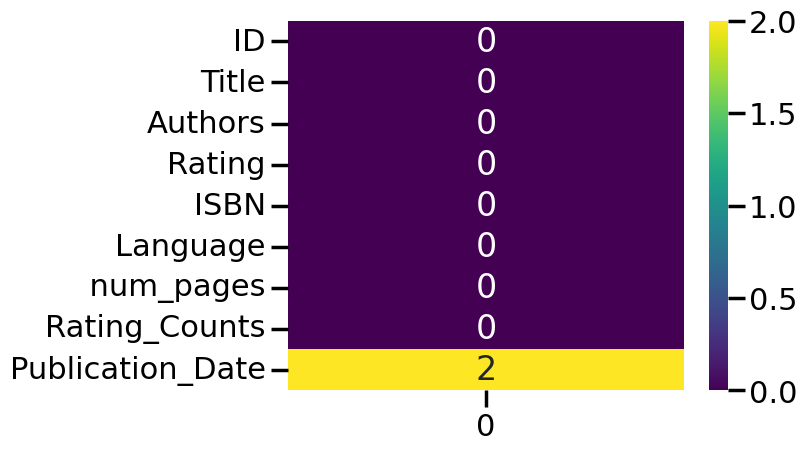

In [54]:
#Show missing values using heatmap
sns.heatmap(b.isnull().sum().to_frame(),annot=True,cmap='viridis')

In [55]:
#Remove missing data from Publication_Date column
b=b.dropna(subset=['Publication_Date'])

In [56]:
#Check for all unique years in column Publication_Date
b['Publication_Date'].unique()

array([2006., 2004., 2003., 2005., 2002., 1996., 2001., 2000., 1990.,
       1993., 1997., 1991., 2012., 1994., 1982., 1986., 1999., 1987.,
       1984., 2007., 1965., 1998., 1995., 1964., 1970., 2011., 1955.,
       1988., 1985., 1989., 1963., 2008., 2009., 1976., 1975., 1980.,
       1992., 1973., 2019., 1954., 2015., 1919., 1921., 1923., 1969.,
       1968., 1961., 1953., 1958., 1983., 1978., 1929., 1977., 1979.,
       1922., 1981., 2010., 1950., 1971., 1960., 1959., 2013., 2017.,
       2016., 1972., 1947., 1943., 1974., 1957., 2014., 2018., 1952.,
       1935., 1956., 1966., 1925., 1962., 1949., 1913., 1928., 1914.,
       1948., 1967., 1900., 2020., 1931., 1940.])

In [11]:
#Change all the values to integer in Publication_Date column
b['Publication_Date'] = pd.to_numeric(b['Publication_Date'], errors='coerce')

In [96]:
#Sort the books by the year of publication
books_2000_2022 = b[b['Publication_Date'] >= 2000]
books_1990_2000 = b[(b['Publication_Date'] >= 1990) & (b['Publication_Date'] < 2000)]
books_1980_1990 = b[(b['Publication_Date'] >= 1980) & (b['Publication_Date'] < 1990)]
books_1970_1980 = b[(b['Publication_Date'] >= 1970) & (b['Publication_Date'] < 1980)]
books_1960_1970 = b[(b['Publication_Date'] >= 1960) & (b['Publication_Date'] < 1970)]
books_1950_1960 = b[(b['Publication_Date'] >= 1950) & (b['Publication_Date'] < 1960)]
books_1940_1950 = b[(b['Publication_Date'] >= 1940) & (b['Publication_Date'] < 1950)]
books_1930_1940 = b[(b['Publication_Date'] >= 1930) & (b['Publication_Date'] < 1940)]
books_1920_1930 = b[(b['Publication_Date'] >= 1920) & (b['Publication_Date'] < 1930)]
books_1910_1920 = b[(b['Publication_Date'] >= 1910) & (b['Publication_Date'] < 1920)]
books_1900_1910 = b[(b['Publication_Date'] >= 1900) & (b['Publication_Date'] < 1910)]

In [133]:
#Check the result after sorting
books_1950_1960

,ID,Title,Authors,Rating,ISBN,Language,num_pages,Rating_Counts,Publication_Date
147,330,On Beyond Zebra!,Dr. Seuss,4.04,0394800842,English,64,2815,1955.0
396,1363,The Histories,Herodotus/Aubrey de Sélincourt/John M. Marincola,3.99,0140446389,English,622,227,1954.0
442,1462,Euripides I: Alcestis / The Medea / The Heracl...,Euripides/Richmond Lattimore/David Grene/Rex W...,4.03,0226307808,English,221,4483,1955.0
489,1548,Electra and Other Plays,Sophocles/E.F. Watling,4.14,0140440283,English,218,135,1953.0
492,1555,The Oedipus Plays of Sophocles,Sophocles/Paul Roche,3.97,0451621603,English,390,8,1958.0
532,1693,On Christian Doctrine,Augustine of Hippo/D.W. Robertson Jr.,4.03,0024021504,English,191,2335,1958.0
782,2549,A Tear and a Smile,Kahlil Gibran/جبران خليل جبران/H.M. Nahmad/Rob...,4.03,0394448049,English,228,2094,1950.0
1047,3557,The Modern Prince and Other Writings,Antonio Gramsci,3.89,0717801330,English,192,118,1959.0
2164,7775,Happy Birthday to You!,Dr. Seuss,4.13,0394800761,English,64,4344,1959.0
2545,9365,Atlas Shrugged,Ayn Rand,3.69,0394415760,English,1168,86,1957.0


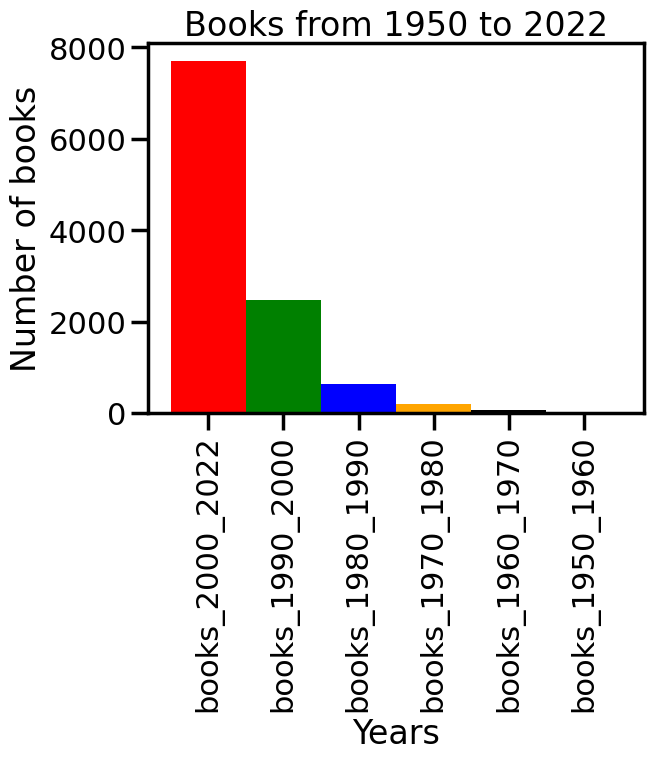

In [162]:
# Show the ratio of the books published in last six decades
left = [1,2,3,4,5,6]
tick_label = ["books_2000_2022", "books_1990_2000", "books_1980_1990", "books_1970_1980", "books_1960_1970", "books_1950_1960"]
height = [books_2000_2022.value_counts().sum(),books_1990_2000.value_counts().sum(),
          books_1980_1990.value_counts().sum(), books_1970_1980.value_counts().sum(), books_1960_1970.value_counts().sum(),
          books_1950_1960.value_counts().sum()]
plt.bar(left, height, tick_label = tick_label,
       width = 1,  color = ["red", "green", "blue", "orange", "black", "yellow"])
plt.xlabel("Years")
plt.ylabel("Number of books")
plt.title("Books from 1950 to 2022")
plt.xticks(rotation = 90)
plt.show()


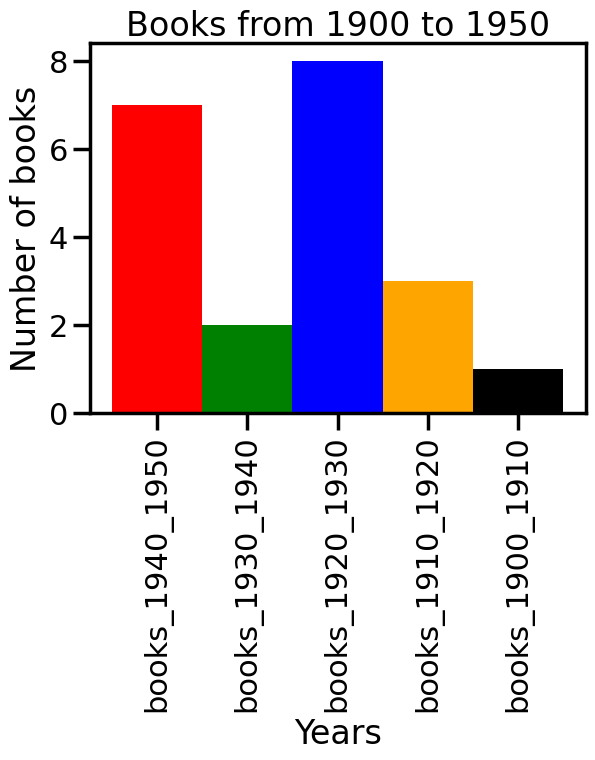

In [163]:
# Show the ratio of the books published from 1900 to 1950
left = [1,2,3,4,5]
tick_label = ["books_1940_1950", "books_1930_1940", "books_1920_1930", "books_1910_1920", "books_1900_1910"]
height = [books_1940_1950.value_counts().sum(),books_1930_1940.value_counts().sum(),
          books_1920_1930.value_counts().sum(), books_1910_1920.value_counts().sum(), books_1900_1910.value_counts().sum()]

plt.bar(left, height, tick_label = tick_label,
       width = 1,  color = ["red", "green", "blue", "orange", "black", "yellow"])
plt.xlabel("Years")
plt.ylabel("Number of books")
plt.title("Books from 1900 to 1950")
plt.xticks(rotation = 90)
plt.show()

In [15]:
#Check for all the languages in Language column
b['Language'].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: Language, dtype: int64

In [16]:
#Replace Language values
b=b.replace({'Language' : { 'eng' : "English", "en-US":"English", "spa":"Spanish", "en-GB":"English", "fre":"French",
                            "ger":"German","jpn":"Japanese", "mul":"Other", "zho":"Other", "grc":"Other",
                            "por":"Portuguese", "en-CA":"English", "ita":"Other", "lat":"Other", "enm":"English",
                            "swe":"Other", "rus":"Other", "nor":"Other", "srp":"Other", "nl":"Other",
                            "tur":"Other", "gla":"Other", "ara":"Other", "msa":"Other", "ale":"Other", 
                            "glg":"Other", "wel":"Other"}})

In [17]:
#Check the Language column after the changes
b['Language'].value_counts()

English       10540
Spanish         218
French          144
German           99
Other            66
Japanese         46
Portuguese       10
Name: Language, dtype: int64

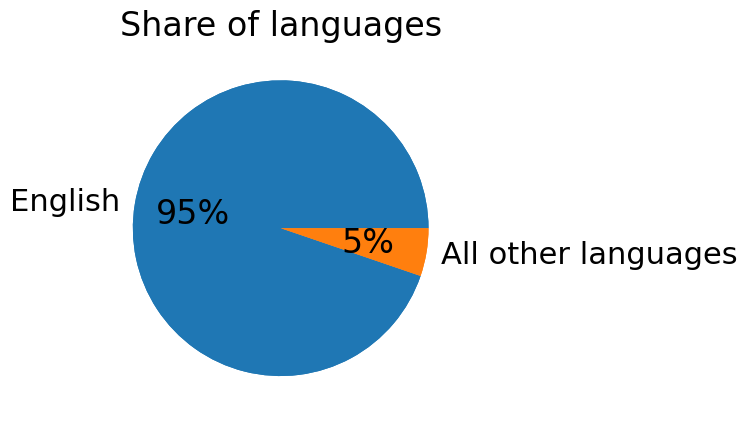

In [18]:
#Show the share of all other languages vs English
x = [10540, 583]
labels = ["English", "All other languages"]
colors = ["tab:blue", "tab:orange"]
fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Share of languages')
ax.pie(x)
plt.show()

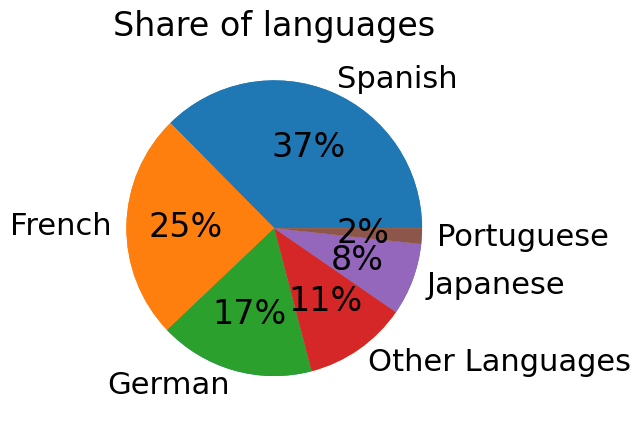

In [19]:
#Show the share of all other languages
x = [218,144,99,66,46,10]
labels = ["Spanish","French", "German", "Other Languages", "Japanese", "Portuguese"]
fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Share of languages')
ax.pie(x)
plt.show()

In [20]:
# applying groupby() function to group the data on language value
books_groupby = b.groupby('Language')

In [21]:
# Print the first entries in all the groups formed
books_groupby.first()

,ID,Title,Authors,Rating,ISBN,num_pages,Rating_Counts,Publication_Date
Language,,,,,,,,
English,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,652,2095690,2006.0
French,80,La Place de la Concorde Suisse,John McPhee,3.92,0374519323,160,698,1994.0
German,2875,Wenn Engel fallen,Tracy Chevalier,3.58,3471772537,384,6,2002.0
Japanese,2885,DEATH NOTE デスノート 1,Tsugumi Ohba/Takeshi Obata/大場 つぐみ/小畑 健,4.43,4088736214,195,227,2004.0
Other,576,1000 Record Covers,Michael Ochs/Patrick Javault/Ulrike Wasel,3.85,3822840858,575,288,2005.0
Portuguese,7838,O Ano do Pensamento Mágico,Joan Didion,3.89,8520918867,224,82,2006.0
Spanish,201,Una arruga en el tiempo – A Wrinkle in Time,Madeleine L'Engle,4.00,0606105263,205,6,1984.0


In [22]:
#Finding the values contained in the "Spanish" group
books_groupby.get_group('Spanish')

,ID,Title,Authors,Rating,ISBN,Language,num_pages,Rating_Counts,Publication_Date
109,201,Una arruga en el tiempo – A Wrinkle in Time,Madeleine L'Engle,4.00,0606105263,Spanish,205,6,1984.0
146,324,Cien años de soledad,Gabriel García Márquez,4.07,0785950109,Spanish,448,63,1990.0
150,337,El perfume: Historia de un asesino,Patrick Süskind,4.02,8432216062,Spanish,239,4136,2002.0
255,762,Crónica de una muerte anunciada,Gabriel García Márquez,3.97,1400034957,Spanish,118,7888,2003.0
256,763,Cien años de soledad,Gabriel García Márquez,4.07,0307350428,Spanish,496,130,2006.0
...,...,...,...,...,...,...,...,...,...
11107,45592,La tía Julia y el escribidor,Mario Vargas Llosa,3.92,8466302298,Spanish,566,162,2001.0
11108,45595,La Tía Julia y el Escribidor,Mario Vargas Llosa,3.92,8432203238,Spanish,447,25,1977.0
11109,45604,Narraciones Extraordinarias,Edgar Allan Poe,4.13,9583006408,Spanish,316,36,2004.0
11110,45607,Las Crónicas de Narnia,C.S. Lewis/Margarita E. Valdes/Gemma Gallart/P...,4.26,0061199001,Spanish,816,186,2006.0


<AxesSubplot:xlabel='Rating', ylabel='Count'>

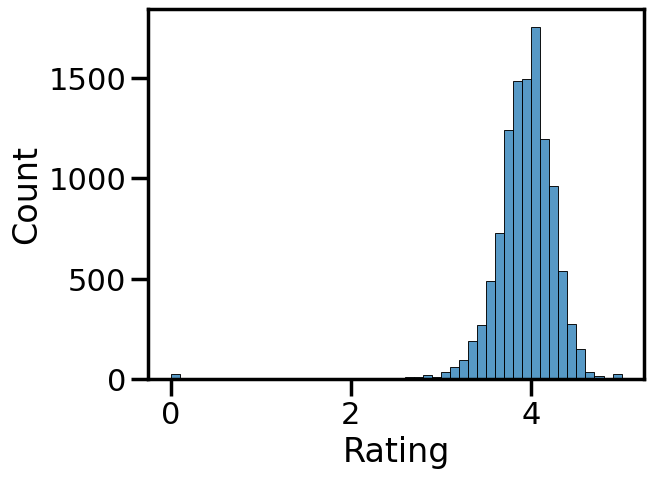

In [98]:
#Relationship between average rating and rating counts
sns.histplot(x=b["Rating"], bins=50)

<function matplotlib.pyplot.show(close=None, block=None)>

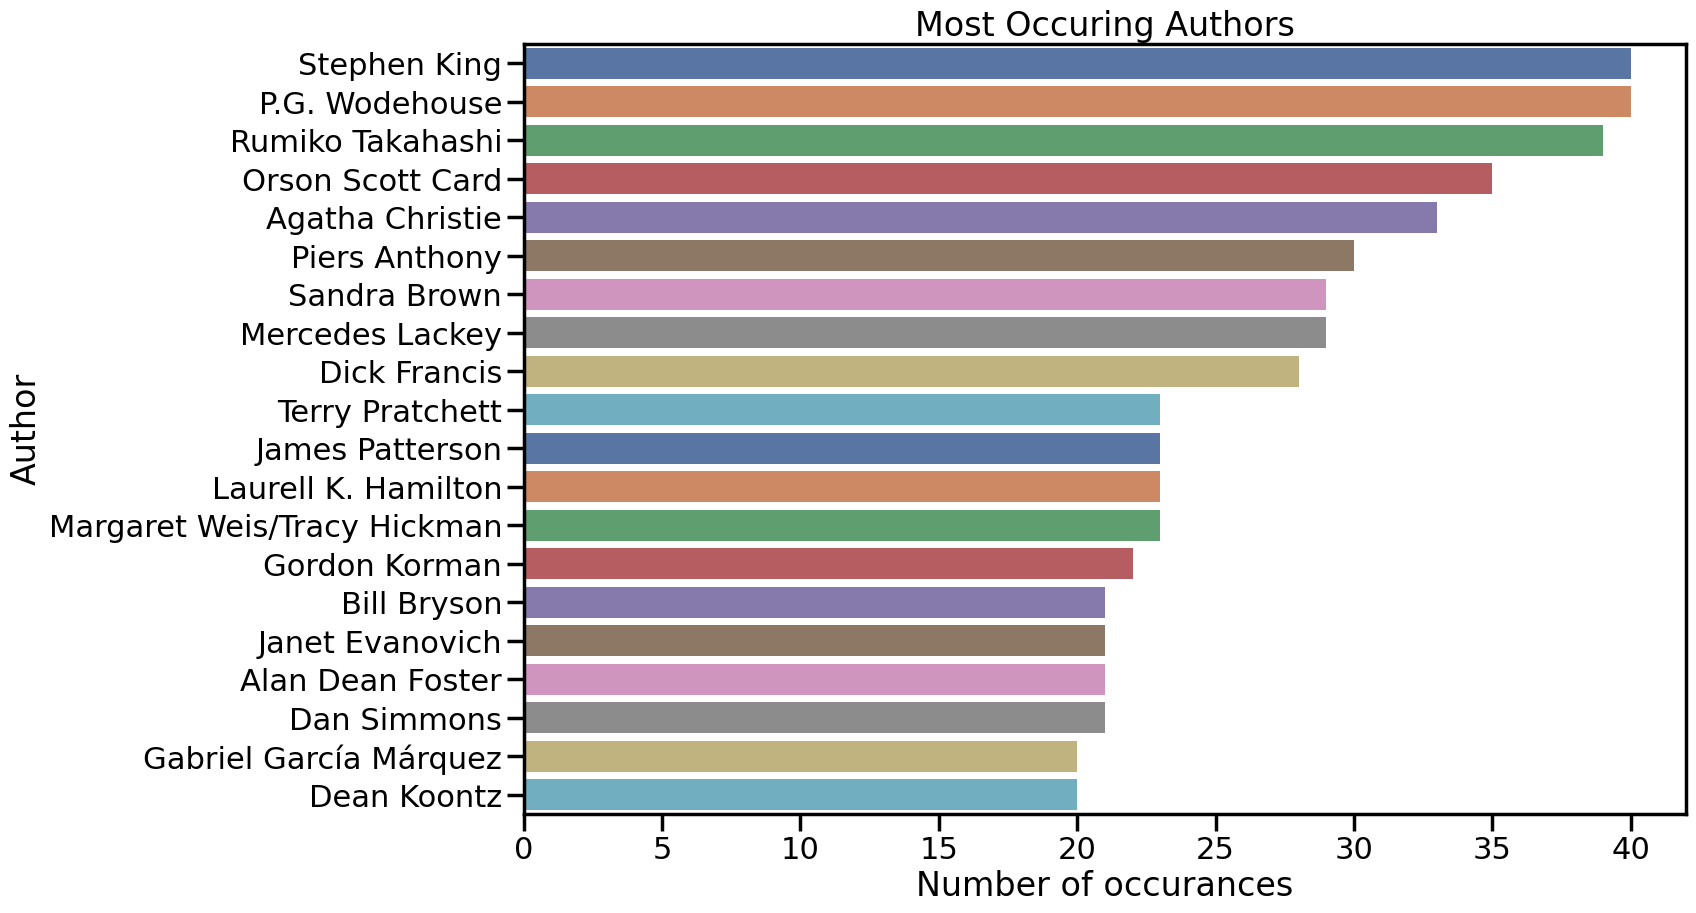

In [50]:
#Who are the authors with most occurences in the list
sns.set_context("poster")
plt.figure(figsize=(15,10))
book = b["Authors"].value_counts()[:20]
sns.barplot(x = book, y = book.index, palette ="deep")
plt.title("Most Occuring Authors")
plt.xlabel("Number of occurances")
plt.ylabel("Author")
plt.show

<AxesSubplot:xlabel='Rating_Counts', ylabel='Title'>

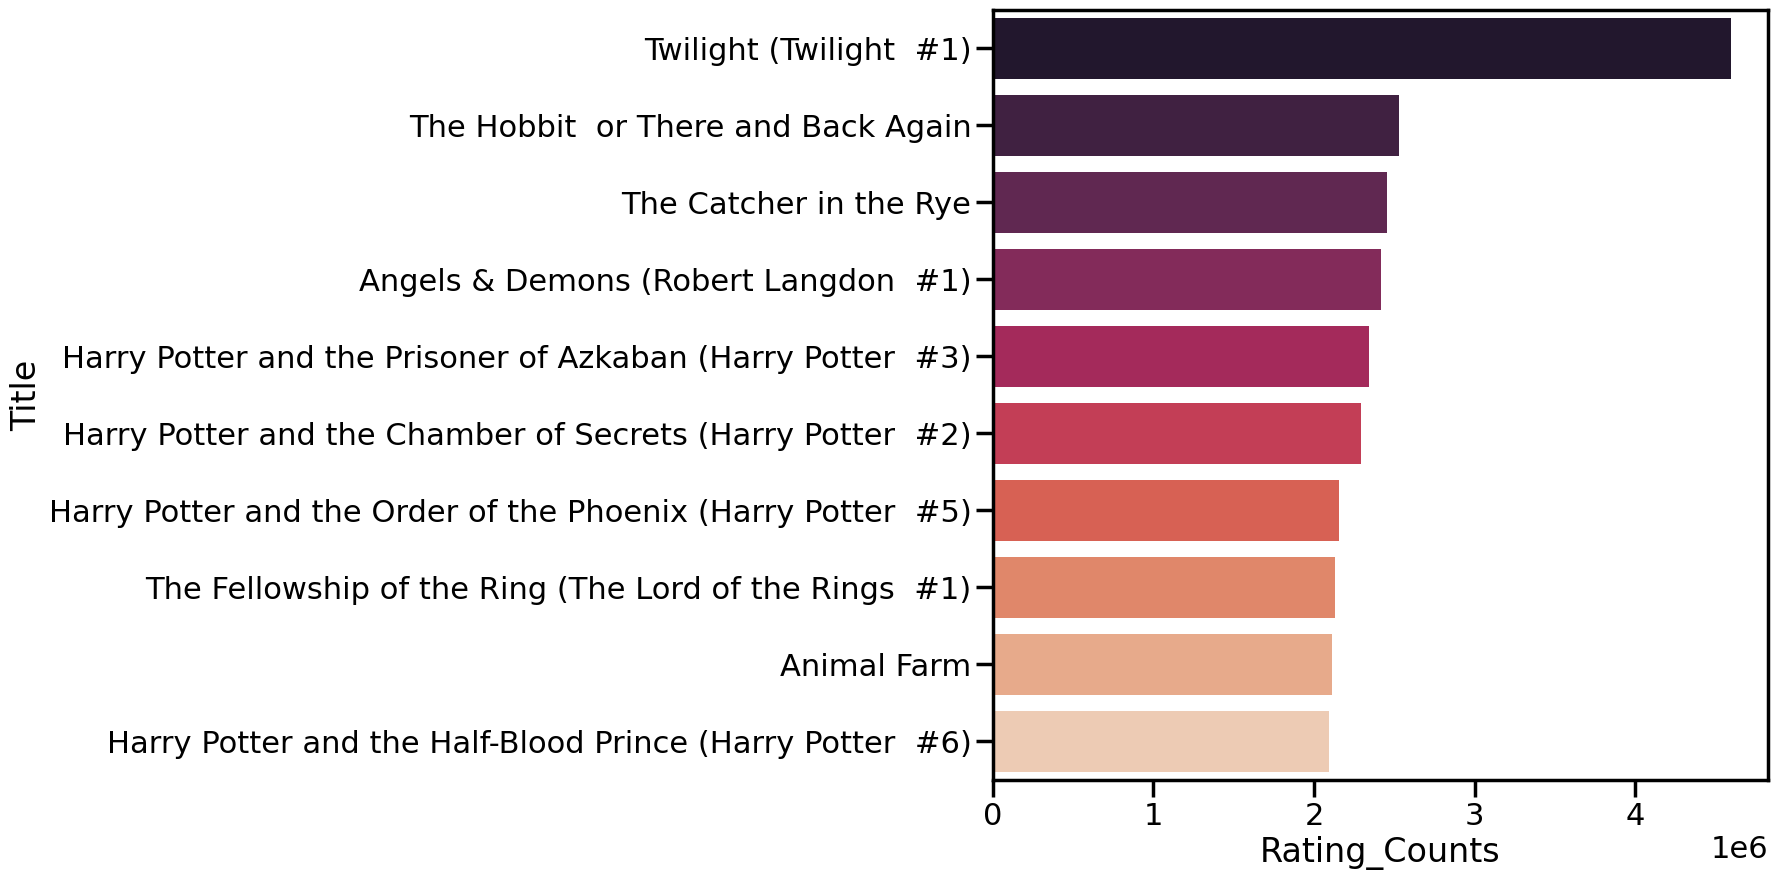

In [57]:
#Which books are most rated
most_rated=b.sort_values("Rating_Counts", ascending=False).head(10).set_index("Title")
plt.figure(figsize=(10,10))
sns.barplot(x=most_rated["Rating_Counts"], y=most_rated.index, palette="rocket")

In [193]:
#Importing data
amazon=pd.read_csv("books_two.csv")

In [194]:
amazon

,Unnamed: 0,Year,Rank,Title,Authors,Rating,Rating_Counts,Price
0,0,2010,1,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,8475,17.24
1,1,2010,2,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,11516,9.99
2,2,2010,3,Decision Points,George W. Bush,4.6,2201,17.80
3,3,2010,4,The Help,Kathryn Stockett,4.8,14772,14.97
4,4,2010,5,The Girl Who Played with Fire (Millennium Series),Stieg Larsson,4.7,7949,0.02
...,...,...,...,...,...,...,...,...
1089,1089,2020,96,"Relationship Goals: How to Win at Dating, Marr...",Michael Todd,4.8,13775,10.49
1090,1090,2020,97,The Happy in a Hurry Cookbook: 100-Plus Fast a...,Steve Doocy,4.7,7923,20.98
1091,1091,2020,98,Learn to Read: A Magical Sight Words and Phoni...,Modern Kid Press,4.7,9455,6.99
1092,1092,2020,99,P is for Potty! (Sesame Street) (Lift-the-Flap),Naomi Kleinberg,4.7,16340,5.68


In [195]:
Books = pd.merge(amazon, b, on=["Title"], how='inner')
Books.drop_duplicates(subset=['Title'], keep='first', inplace=True, ignore_index=True)

In [196]:
Books.head(2)

,Unnamed: 0,Year,Rank,Title,Authors_x,Rating_x,Rating_Counts_x,Price,ID,Authors_y,Rating_y,ISBN,Language,num_pages,Rating_Counts_y,Publication_Date
0,28,2010,29,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,4.6,3792,19.54,21343,Patrick Lencioni,4.04,0787960756,English,227,65444,2002.0
1,45,2010,46,George Washington's Sacred Fire,Peter A. Lillback,4.5,462,1.00,6475,Peter A. Lillback/Jerry Newcombe,4.18,0978605268,English,1200,694,2011.0


In [197]:
#Adding new columns for the mean value of two existing columns
Books["Average_Rating"] = Books[["Rating_x", "Rating_y"]].mean(axis=1)
Books["Rating_Counts"] = Books [["Rating_Counts_x", "Rating_Counts_y"]].mean(axis=1)

In [198]:
Books.head(2)

,Unnamed: 0,Year,Rank,Title,Authors_x,Rating_x,Rating_Counts_x,Price,ID,Authors_y,Rating_y,ISBN,Language,num_pages,Rating_Counts_y,Publication_Date,Average_Rating,Rating_Counts
0,28,2010,29,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,4.6,3792,19.54,21343,Patrick Lencioni,4.04,0787960756,English,227,65444,2002.0,4.32,34618.0
1,45,2010,46,George Washington's Sacred Fire,Peter A. Lillback,4.5,462,1.00,6475,Peter A. Lillback/Jerry Newcombe,4.18,0978605268,English,1200,694,2011.0,4.34,578.0


In [199]:
#Checking for all the names of column in DataFrame
Books.columns

Index(['Unnamed: 0', 'Year', 'Rank', 'Title', 'Authors_x', 'Rating_x',
       'Rating_Counts_x', 'Price', 'ID', 'Authors_y', 'Rating_y', 'ISBN',
       'Language', '  num_pages', 'Rating_Counts_y', 'Publication_Date',
       'Average_Rating', 'Rating_Counts'],
      dtype='object')

In [200]:
#Drop unwanted columns
books=Books.drop(['Unnamed: 0', 'Year', "Rank", "Rating_x", 'Rating_Counts_x', '  num_pages', 'Authors_y',
                  'Rating_y', 'ISBN', 'Rating_Counts_y'], axis=1)
books.head(2)

,Title,Authors_x,Price,ID,Language,Publication_Date,Average_Rating,Rating_Counts
0,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,19.54,21343,English,2002.0,4.32,34618.0
1,George Washington's Sacred Fire,Peter A. Lillback,1.00,6475,English,2011.0,4.34,578.0


In [201]:
#Rename the columns
books.rename(columns = {"Authors_x":"Authors"}, inplace="True")

In [202]:
#Declare a list that is to be converted into a new column
Genre = ["Nonfiction","Nonfiction","Nonfiction","Nonfiction","Fiction","Fiction","Fiction","Fiction","Fiction","Nonfiction",
        "Fiction","Fiction","Fiction","Fiction","Fiction","Fiction","Fiction","Fiction","Fiction","Nonfiction","Fiction","Nonfiction"]

In [203]:
#Adding a new column
books["Genre"] = Genre

In [204]:
#Check for the columns after the change
books.columns

Index(['Title', 'Authors', 'Price', 'ID', 'Language', 'Publication_Date',
       'Average_Rating', 'Rating_Counts', 'Genre'],
      dtype='object')

In [205]:
#Accesing to specific column
books["Authors"]

0        Patrick Lencioni
1       Peter A. Lillback
2        Stephen R. Covey
3        Malcolm Gladwell
4               Mark Nepo
5            Markus Zusak
6          J. D. Salinger
7     F. Scott Fitzgerald
8            Paulo Coelho
9             David Allen
10         David Mitchell
11              Dan Brown
12             Eric Carle
13             Harper Lee
14        William Golding
15           Ray Bradbury
16           S. E. Hinton
17    Margaret Wise Brown
18         John Steinbeck
19            Ron Chernow
20        Margaret Atwood
21       Viktor E. Frankl
Name: Authors, dtype: object

In [206]:
#Accesing to first 5 rows of specific columns
books[0:5][['Authors', 'Title']]

,Authors,Title
0,Patrick Lencioni,The Five Dysfunctions of a Team: A Leadership ...
1,Peter A. Lillback,George Washington's Sacred Fire
2,Stephen R. Covey,The 7 Habits of Highly Effective People: Power...
3,Malcolm Gladwell,The Tipping Point: How Little Things Can Make ...
4,Mark Nepo,The Book of Awakening: Having the Life You Wan...


In [207]:
books.head(5)

,Title,Authors,Price,ID,Language,Publication_Date,Average_Rating,Rating_Counts,Genre
0,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,19.54,21343,English,2002.0,4.320,34618.0,Nonfiction
1,George Washington's Sacred Fire,Peter A. Lillback,1.00,6475,English,2011.0,4.340,578.0,Nonfiction
2,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,33.77,36072,English,2004.0,4.350,221351.0,Nonfiction
3,The Tipping Point: How Little Things Can Make ...,Malcolm Gladwell,0.94,2612,English,2002.0,4.185,318501.0,Nonfiction
4,The Book of Awakening: Having the Life You Wan...,Mark Nepo,26.08,7581,English,2000.0,4.505,3985.0,Fiction


In [208]:
# convert column Price to numpy array
arr = books["Price"].to_numpy()

#Find the new price if the prices increase by 5 percent
new_price = arr + ((arr / 100) * 5)
new_price

array([20.517 ,  1.05  , 35.4585,  0.987 , 27.384 ,  0.3675,  7.161 ,
        9.177 , 39.795 ,  0.3675,  1.5645, 15.4875,  0.987 ,  0.3675,
        0.987 ,  1.323 ,  6.1845,  0.2625,  0.3675,  3.1605,  8.3895,
        8.8095])

In [209]:
#Add new column to dataframe with the new price
books['New_Price'] = new_price.tolist()
books

,Title,Authors,Price,ID,Language,Publication_Date,Average_Rating,Rating_Counts,Genre,New_Price
0,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,19.54,21343,English,2002.0,4.320,34618.0,Nonfiction,20.5170
1,George Washington's Sacred Fire,Peter A. Lillback,1.00,6475,English,2011.0,4.340,578.0,Nonfiction,1.0500
2,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,33.77,36072,English,2004.0,4.350,221351.0,Nonfiction,35.4585
3,The Tipping Point: How Little Things Can Make ...,Malcolm Gladwell,0.94,2612,English,2002.0,4.185,318501.0,Nonfiction,0.9870
4,The Book of Awakening: Having the Life You Wan...,Mark Nepo,26.08,7581,English,2000.0,4.505,3985.0,Fiction,27.3840
5,The Book Thief,Markus Zusak,0.35,19063,English,2006.0,4.485,771170.5,Fiction,0.3675
6,The Catcher in the Rye,J. D. Salinger,6.82,5107,English,2001.0,4.150,1235866.5,Fiction,7.1610
7,The Great Gatsby,F. Scott Fitzgerald,8.74,4673,English,2003.0,4.140,5685.5,Fiction,9.1770
8,The Alchemist,Paulo Coelho,37.90,864,English,2006.0,4.280,21452.0,Fiction,39.7950
9,Getting Things Done: The Art of Stress-Free Pr...,David Allen,0.35,1633,English,2002.0,4.245,54546.0,Nonfiction,0.3675


In [210]:
books.head(2)

,Title,Authors,Price,ID,Language,Publication_Date,Average_Rating,Rating_Counts,Genre,New_Price
0,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,19.54,21343,English,2002.0,4.32,34618.0,Nonfiction,20.517
1,George Washington's Sacred Fire,Peter A. Lillback,1.00,6475,English,2011.0,4.34,578.0,Nonfiction,1.050


In [211]:
#Sort data by price from highest to lowest
books_by_price=books.sort_values(["Price"], ascending=False)
books_by_price.head(5)

,Title,Authors,Price,ID,Language,Publication_Date,Average_Rating,Rating_Counts,Genre,New_Price
8,The Alchemist,Paulo Coelho,37.90,864,English,2006.0,4.280,21452.0,Fiction,39.7950
2,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,33.77,36072,English,2004.0,4.350,221351.0,Nonfiction,35.4585
4,The Book of Awakening: Having the Life You Wan...,Mark Nepo,26.08,7581,English,2000.0,4.505,3985.0,Fiction,27.3840
0,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,19.54,21343,English,2002.0,4.320,34618.0,Nonfiction,20.5170
11,Inferno,Dan Brown,14.75,19163,English,2004.0,4.050,15962.0,Fiction,15.4875


In [212]:
#Adding new column using if statment
books['Acces'] = books.apply(lambda x: 'Expensive'
                             if x['Price'] > 20
                                   else 'Good price', axis=1)
books.head(2)

,Title,Authors,Price,ID,Language,Publication_Date,Average_Rating,Rating_Counts,Genre,New_Price,Acces
0,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,19.54,21343,English,2002.0,4.32,34618.0,Nonfiction,20.517,Good price
1,George Washington's Sacred Fire,Peter A. Lillback,1.00,6475,English,2011.0,4.34,578.0,Nonfiction,1.050,Good price


In [213]:
#For loop
for index, row in books.iterrows(): 
    print("Author of the book " + row["Title"] + " is " + row["Authors"] +".")

Author of the book The Five Dysfunctions of a Team: A Leadership Fable is Patrick Lencioni.
Author of the book George Washington's Sacred Fire is Peter A. Lillback.
Author of the book The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change is Stephen R. Covey.
Author of the book The Tipping Point: How Little Things Can Make a Big Difference is Malcolm Gladwell.
Author of the book The Book of Awakening: Having the Life You Want by Being Present to the Life You Have is Mark Nepo.
Author of the book The Book Thief is Markus Zusak.
Author of the book The Catcher in the Rye is J. D. Salinger.
Author of the book The Great Gatsby is F. Scott Fitzgerald.
Author of the book The Alchemist is Paulo Coelho.
Author of the book Getting Things Done: The Art of Stress-Free Productivity is David Allen.
Author of the book Cloud Atlas is David Mitchell.
Author of the book Inferno is Dan Brown.
Author of the book The Very Hungry Caterpillar is Eric Carle.
Author of the book To Kill a 

In [214]:
#Check for the books publishe after 2010 
a=books[books['Publication_Date'] >2010]
a

,Title,Authors,Price,ID,Language,Publication_Date,Average_Rating,Rating_Counts,Genre,New_Price,Acces
1,George Washington's Sacred Fire,Peter A. Lillback,1.0,6475,English,2011.0,4.34,578.0,Nonfiction,1.05,Good price


In [215]:
# Getting the value count of each genre variable in a dataframe
books['Genre'].value_counts()

Fiction       15
Nonfiction     7
Name: Genre, dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='count'>

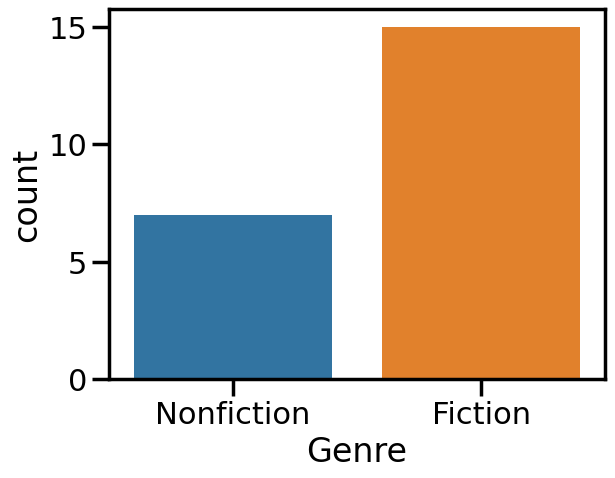

In [216]:
sns.countplot(x=books["Genre"])

<AxesSubplot:xlabel='Average_Rating', ylabel='Count'>

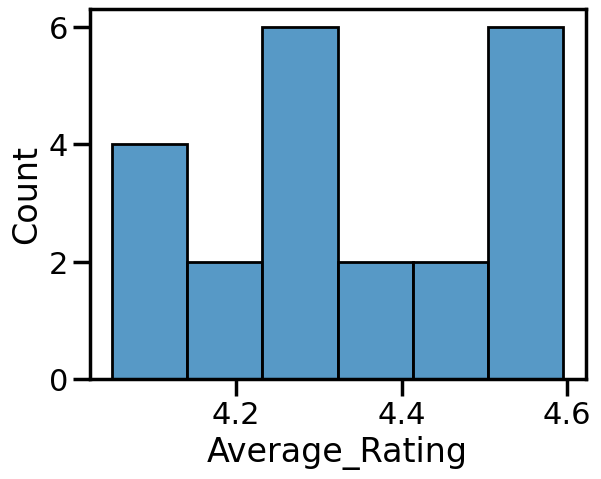

In [217]:
#Check the average rating
sns.histplot(books["Average_Rating"])

<AxesSubplot:xlabel='Rating_Counts', ylabel='Title'>

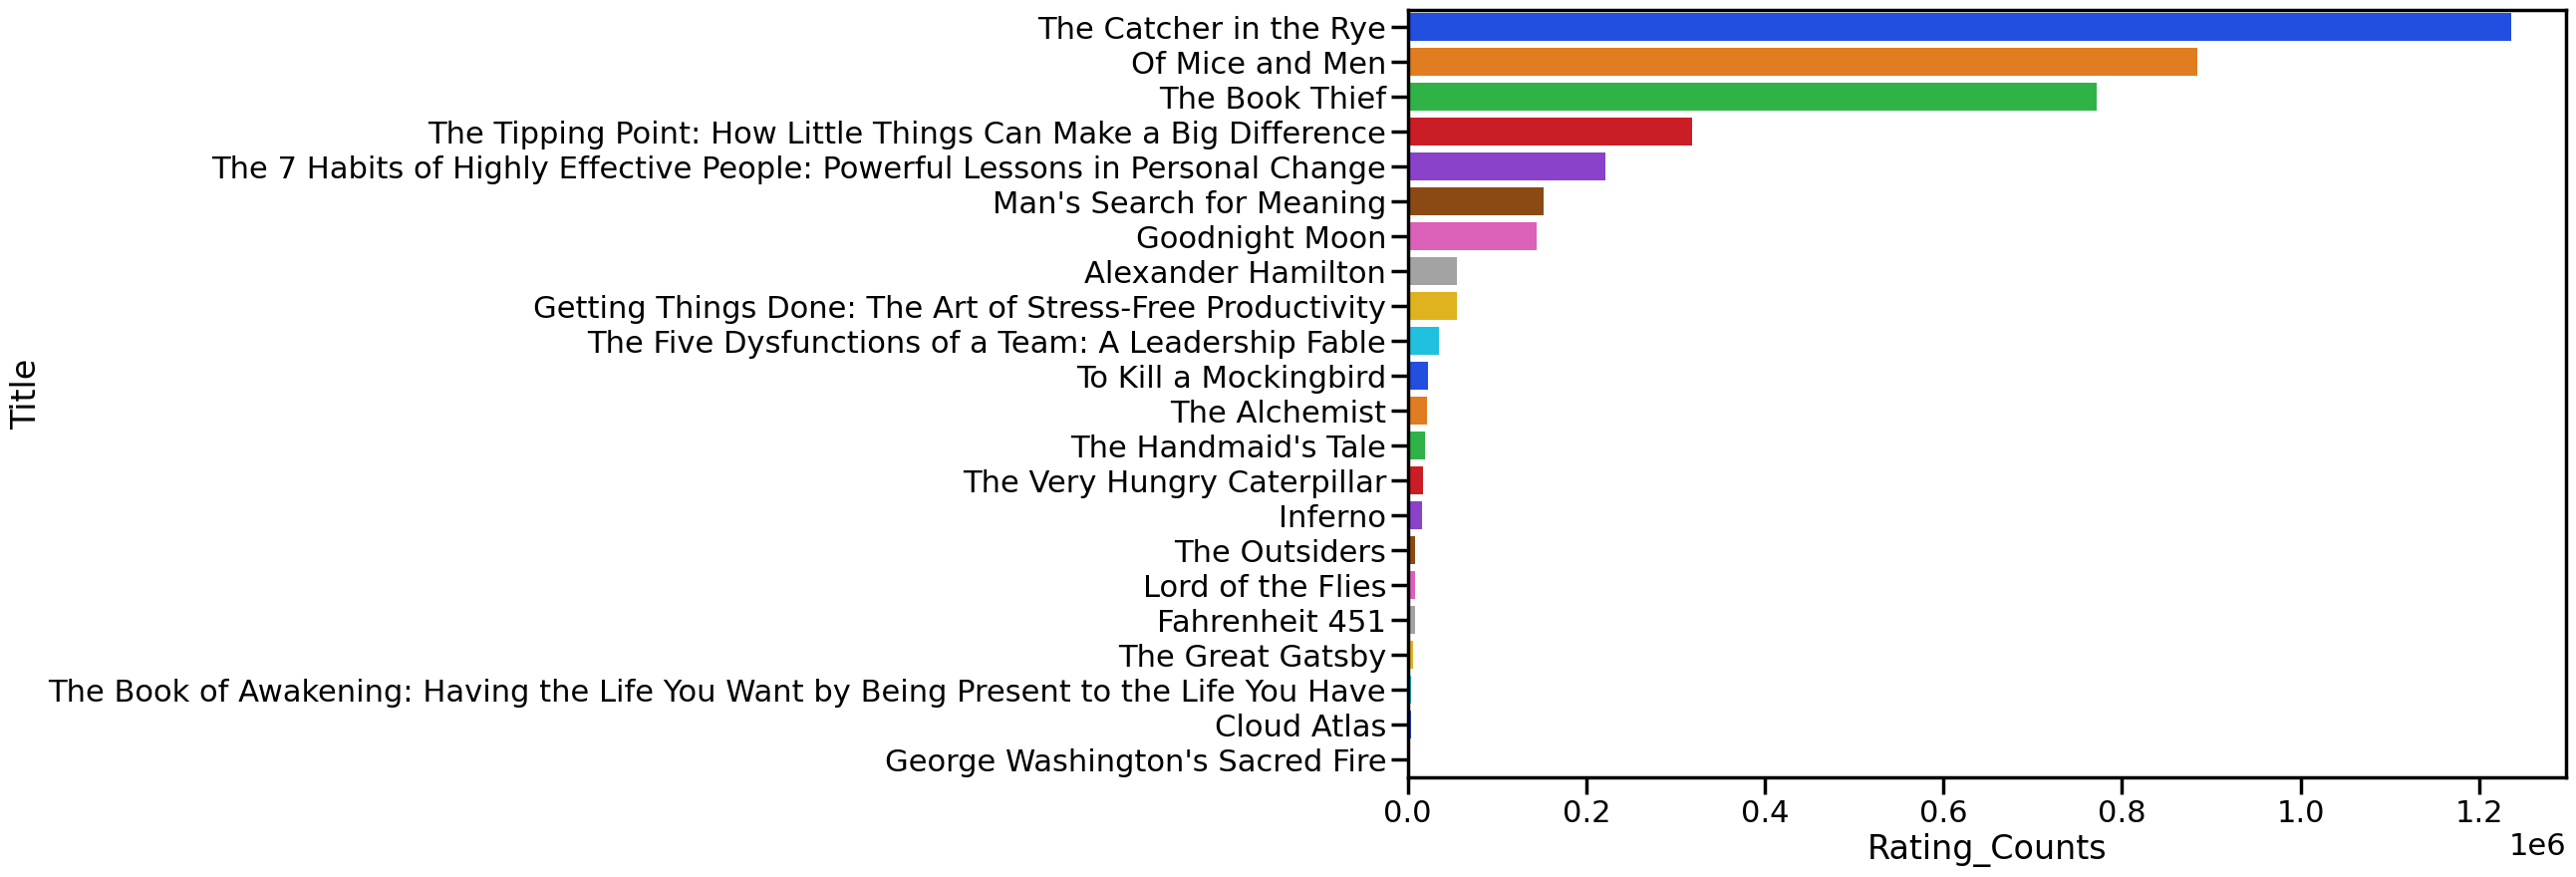

In [218]:
#Books sorted by the numbers of rating
most_rated=books.sort_values("Rating_Counts", ascending=False).set_index("Title")
plt.figure(figsize=(15,10))
sns.barplot(x=most_rated["Rating_Counts"], y=most_rated.index, palette="bright")

In [219]:
books.to_csv('combined_books.csv')